Notes:

* Link to Data: [Load Default Prediction Datasets](https://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction/data)
* Feel free to clean, add new features or drop

Estimators that allow NaN values for type classifier:
* BaggingClassifier
* DecisionTreeClassifier
* HistGradientBoostingClassifier

In [ ]:
# if you want to temporarily upload the datasets, ignore this
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#use your own drive path here
#Shubhnoor path
# path = "/content/drive/MyDrive/Colab Notebooks/MMAI 869 - Team Assignment/LoanData/"

#Lauren Path
#path = "/content/drive/MyDrive/Colab Notebooks/Data/"

#Andre's Path
#path = "/content/drive/My Drive/Education/Notes/MMAI 869 - Machine Learning and AI Technology/Assignments/Team/Dataset - Zindi Loan Default Prediction/"

#Sam Xie's Path
#path = "/content/drive/MyDrive/869_datasets/"

#Marc's Path
path = "/content/drive/MyDrive/Colab Notebooks/Data/"


In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
import seaborn as sn
import random
import datetime as dt

In [ ]:
traindemo = pd.read_csv(path + "traindemographics.csv", parse_dates=['birthdate'])
testdemo = pd.read_csv(path + "testdemographics.csv", parse_dates=['birthdate'])
trainperf = pd.read_csv(path + "trainperf.csv", parse_dates=['approveddate','creationdate'])
testperf = pd.read_csv(path + "testperf.csv", parse_dates=['approveddate','creationdate'])
trainprevloans = pd.read_csv(path + "trainprevloans.csv", parse_dates=['approveddate','creationdate','closeddate',
                                                                           'firstduedate','firstrepaiddate'])
testprevloans = pd.read_csv(path + "testprevloans.csv", parse_dates=['approveddate','creationdate','closeddate',
                                                                           'firstduedate','firstrepaiddate'])

In [ ]:
# Combine train and test demographics
traindemo = pd.concat([traindemo, testdemo], ignore_index=True)

# Combine train and test previous loans
trainprevloans = pd.concat([trainprevloans, testprevloans], ignore_index=True)


In [ ]:
traindemo.shape


(5833, 9)

In [ ]:
testdemo.shape

(1487, 9)

In [ ]:
print(trainperf.shape)
print(traindemo.shape)
print(trainprevloans.shape)

(4368, 10)
(5833, 9)
(24090, 12)


# Dropping duplicated rows

In [ ]:
# List of DataFrame names and their corresponding variables
df_names = ['traindemo', 'testdemo', 'trainperf', 'testperf', 'trainprevloans', 'testprevloans']
dfs = [traindemo, testdemo, trainperf, testperf, trainprevloans, testprevloans]

# Iterate through each DataFrame
for name, df in zip(df_names, dfs):
    # Print the number of duplicates
    num_duplicates = df.duplicated().sum()
    print(f"{name} has {num_duplicates} duplicate rows.")

    # Drop duplicates
    df.drop_duplicates(inplace=True)

# Now each DataFrame in the list 'dfs' has duplicates removed

traindemo has 15 duplicate rows.
testdemo has 3 duplicate rows.
trainperf has 0 duplicate rows.
testperf has 0 duplicate rows.
trainprevloans has 0 duplicate rows.
testprevloans has 0 duplicate rows.


In [ ]:
# List of DataFrame names and their corresponding variables
df_names = ['traindemo', 'testdemo', 'trainperf', 'testperf', 'trainprevloans', 'testprevloans']
dfs = [traindemo, testdemo, trainperf, testperf, trainprevloans, testprevloans]

# Check for duplicates in each DataFrame
for name, df in zip(df_names, dfs):
    # Count duplicates
    num_duplicates = df.duplicated().sum()

    # Check if duplicates exist
    if num_duplicates == 0:
        print(f"No duplicates found in {name}.")
    else:
        print(f"Warning: {num_duplicates} duplicates found in {name}.")


No duplicates found in traindemo.
No duplicates found in testdemo.
No duplicates found in trainperf.
No duplicates found in testperf.
No duplicates found in trainprevloans.
No duplicates found in testprevloans.


In [ ]:
print(trainperf.shape)
print(traindemo.shape)
print(trainprevloans.shape)

(4368, 10)
(5818, 9)
(24090, 12)


### Merge Train DF on demographic + current loans (traindemo, trainperf)

In [ ]:
# Find customer IDs in traindemo that are not in trainperf
dropped_customer_ids = set(traindemo['customerid']) - set(trainperf['customerid'])

# Convert the set to a list (optional, based on your preference)
dropped_customer_ids_list = list(dropped_customer_ids)

# Perform a left merge
traindf = trainperf.merge(traindemo, on='customerid')

# Print the list of dropped customer IDs (or save it to a file, as needed)
print("Dropped customer IDs:", dropped_customer_ids_list)
print("Count of Dropped Customer IDs:", len(dropped_customer_ids_list))




Dropped customer IDs: ['8a858e135c7e2eec015c81e0d3d1325d', '8a858e6a5cc6b1aa015cc90e451e31e0', '8a858e045b495c30015b5317021320fa', '8a858e605ce99f55015cea610eab6542', '8a858ef358d4a48e0158e97fe129792e', '8a8588dc5384a05f0153895b425a2a63', '8a858e685c174778015c1a1c2b6b557b', '8a858f665c45930d015c50908f4d2df3', '8a858966538deb190153957484683e67', '8a858e965b5e1b91015b60d410a170e9', '8a858e445ca25ee3015ca6262dd83aaf', '8a85883353d0c4e90153d308b87e7f1a', '8a858e0d59b7438d0159bad16dec7397', '8a858fe8555f401f01555f4577350080', '8a858f5d5929e0fd015945f72b1420e1', '8a858f985bee01cb015befa895cd7226', '8a858f1959d4ea4d0159d56ed9c448f1', '8a858e225a22cf58015a2471b4854027', '8a858f665c2142a0015c2cf209e20a6f', '8a858f1b5b256bc9015b3039f72a13d5', '8a858e435bedeb4f015bf103d73403bf', '8a858ed55c63db54015c6e0859c72f24', '8a858fda5c1bd1f7015c1be7f7450f37', '8a858fb75cf4b2bd015cf85128965269', '8a858e495d1e235c015d2cab67f045eb', '8a858eb05d2d1297015d317c118f380e', '8a858f0056b7cf8e0156bd17f476237d', '8a85

In [ ]:
#check shapes before and after merge
traindf.shape
trainperf.shape

(4368, 10)

In [ ]:
#perform same merge on the test dfs
# Perform a left merge
#testdf = testperf.merge(traindemo, on='customerid',how = 'left')

#testdf.shape

### check Train DF info

In [ ]:
traindf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,1972-01-15,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,1985-08-23,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,1984-09-18,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,1977-10-10,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,1986-09-07,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int64         
 2   loannumber                  4368 non-null   int64         
 3   approveddate                4368 non-null   datetime64[ns]
 4   creationdate                4368 non-null   datetime64[ns]
 5   loanamount                  4368 non-null   float64       
 6   totaldue                    4368 non-null   float64       
 7   termdays                    4368 non-null   int64         
 8   referredby                  587 non-null    object        
 9   good_bad_flag               4368 non-null   object        
 10  birthdate                   4368 non-null   datetime64[ns]
 11  bank_account_type           4368 non-null   object      

In [ ]:
traindf.duplicated().sum()

0

# Dealing with Missing Values in train df

In [ ]:
traindf.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3781
good_bad_flag                    0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4325
employment_status_clients      657
level_of_education_clients    3763
dtype: int64

In [ ]:
traindf.bank_branch_clients.value_counts()

OGBA                                                              3
OBA AKRAN                                                         2
APAPA                                                             2
DUGBE,IBADAN                                                      1
MUSHIN BRANCH                                                     1
AKURE BRANCH                                                      1
40,SAPELE ROAD ,OPPOSITE DUMAZ JUNCTION BENIN CITY EDO STATE.     1
LEKKI EPE                                                         1
TRANS AMADI                                                       1
WHARF ROAD, APAPA                                                 1
17, SANUSI FAFUNWA STREET, VICTORIA ISLAND, LAGOS                 1
BOSSO ROAD, MINNA                                                 1
IKEJA                                                             1
OAU ILE IFE                                                       1
 IDI - ORO MUSHIN                               

High number of variables and null values in this feature 'bank_branch_clients'. We can drop this column.

In [ ]:
#Dropping the bank_branch_clients feature
traindf = traindf.drop(['bank_branch_clients'], axis=1)

In [ ]:
traindf.employment_status_clients.value_counts()

Permanent        3130
Self-Employed     368
Student           142
Unemployed         62
Retired             7
Contract            2
Name: employment_status_clients, dtype: int64

In [ ]:
traindf.level_of_education_clients.value_counts()

Graduate         444
Secondary         88
Post-Graduate     66
Primary            7
Name: level_of_education_clients, dtype: int64

### Converting NaN to a value [ For now replacing with unknown, can use other techniques]

* employment_status_clients: NaN = Permanent
* level_of_education_clients: NaN = Others
* referredby_x: NaN = 0
* referredby_y: NaN = 0

## Imp Note: Some algorithms can handle missing data on their own. So, understand your ML algo carefully.

**level_of_education_clients = NaN = Others**

In [ ]:
traindf["level_of_education_clients"] = traindf["level_of_education_clients"].fillna("Others")

In [ ]:
traindf.level_of_education_clients.value_counts()

Others           3763
Graduate          444
Secondary          88
Post-Graduate      66
Primary             7
Name: level_of_education_clients, dtype: int64

**employment_status_clients - NaN = Permanent**

In [ ]:
traindf.query("bank_name_clients == 'GT Bank' and  employment_status_clients == 'Permanent'").head(3) #1117 rows
#traindf.query("bank_name_clients == 'GT Bank' and  employment_status_clients != 'Permanent'") #477 rows
#traindf.query("bank_name_clients == 'First Bank' and  employment_status_clients == 'Permanent'") #429 rows


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,Primary
6,8a858e095c59b91b015c5e5cea3719bc,301972027,3,2017-07-10 19:25:33,2017-07-10 18:25:28,10000.0,13000.0,30,NaN,Good,1989-05-29,Savings,3.259444,6.557011,GT Bank,Permanent,Others


Can observe that the most frequent is the 'Permanent' for most of the rows, also used sklearn iterative imputer and MICE techniques. Result is same - these techniques impute Permanent.

Refer to [Colab NB](https://colab.research.google.com/drive/1vb4lLKir13KVS4UfAYKkOcl5kiufEe0y?usp=sharing) for the implementation of these techniques.

In [ ]:
traindf["employment_status_clients"] = traindf["employment_status_clients"].fillna("Permanent")

**referredby_x: NaN = 0**<br>
**referredby_y: NaN = 0**

## Rename columns that are part of the original train perf to differentiate from trainprevloans aggregated data

In [ ]:
#Add '_x' to all of the columns that came from the 'trainperf' df so we can keep track later of what comes from 'trainperf' vs what comes from 'trainprevloans'
# List of columns to which you want to add the suffix '_x'
columns_to_rename = ['systemloanid', 'loannumber', 'approveddate', 'creationdate',
                     'loanamount', 'totaldue', 'termdays', 'referredby', 'good_bad_flag']

# Renaming the columns
traindf = traindf.rename(columns={col: col + '_x' for col in columns_to_rename})

# Display the new column names to verify
print(traindf.columns)

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'referredby_x', 'good_bad_flag_x', 'birthdate', 'bank_account_type',
       'longitude_gps', 'latitude_gps', 'bank_name_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')


In [ ]:
#Converting referred by columns to binary where 1 for referral and 0 for no referral
traindf['referredby_x'] = traindf['referredby_x'].notnull().astype('int')

print("referredby_X: ", traindf.referredby_x.value_counts())

referredby_X:  0    3781
1     587
Name: referredby_x, dtype: int64


In [ ]:
traindf.head(3)

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,good_bad_flag_x,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,0,Good,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,Good,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,0,Good,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,Others


### Converting birthdate to Age and dropping the birthdate column

In [ ]:
#converting string to datetime
traindf['birthdate']=pd.to_datetime(traindf['birthdate'])

In [ ]:
#Calculating Age and adding the new feature to the dataframe - using 2017 as data is from 2017 and we want to get age at time of loan request
traindf['Age'] = 2017 - traindf.birthdate.dt.year
traindf['Age']

0       45
1       32
2       33
3       40
4       31
        ..
4363    39
4364    28
4365    28
4366    27
4367    29
Name: Age, Length: 4368, dtype: int64

In [ ]:
#Dropping the birthdate feature
traindf = traindf.drop(['birthdate'], axis=1)

In [ ]:
traindf.head(3)

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,good_bad_flag_x,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,0,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,45
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,Good,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,32
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,0,Good,Other,11.139350,10.292041,EcoBank,Permanent,Others,33


In [ ]:
traindf.isnull().sum()

customerid                    0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
referredby_x                  0
good_bad_flag_x               0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Age                           0
dtype: int64

### Converting target 'good_bad_flag' - categorical to numerical

In [ ]:
goodbad={'Good':1,'Bad':0}
traindf['good_bad_flag_x']=traindf.good_bad_flag_x.map(goodbad)
traindf.good_bad_flag_x

0       1
1       1
2       1
3       1
4       1
       ..
4363    0
4364    0
4365    0
4366    0
4367    0
Name: good_bad_flag_x, Length: 4368, dtype: int64

### Calculate the duration of loan creation to approval (difference)

vote not to use because testperf csv doesnt have approveddate and creationdate in time format. just hours. not using in train or test bc of this


In [ ]:
# Calculate the duration in hours
# First, find the total duration in seconds and then convert to hours
#traindf['creationdate_approveddate_difference'] = (traindf['approveddate_x'] - traindf['creationdate_x']).dt.total_seconds() / 3600

# Display the DataFrame with the new column
#traindf.head(3)

# Data Aggregation at Customer Level

Note: .astype(int): Converts the boolean array obtained into an integer array, where True becomes 1 and False becomes 0.

In [ ]:
trainprevcopy = trainprevloans.copy()

#grouping by 'customerid'
grouped_df = trainprevcopy.groupby('customerid')


In [ ]:
grouped_df.head( )

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35
...,...,...,...,...,...,...,...,...,...,...,...,...
24085,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32,2017-04-09 22:04:10,10000.0,13000.0,30,2017-05-02 22:27:03,8a858e4f5929c3df0159420645f46f55,2017-05-09,2017-05-02 22:11:54
24086,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17,2017-04-15 22:33:05,10000.0,11500.0,15,2017-04-25 19:32:42,NaN,2017-05-02,2017-04-25 19:17:33
24087,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28,2017-06-26 14:45:20,10000.0,13000.0,30,2017-07-13 13:12:43,NaN,2017-07-26,2017-07-13 13:02:34
24088,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10,2017-05-03 05:56:04,10000.0,13000.0,30,2017-06-01 22:00:17,NaN,2017-06-02,2017-06-01 21:50:07


In [ ]:

# Performing aggregations
aggregated_df = grouped_df.agg({
    'loanamount': ['sum', 'mean', 'median', 'max', 'min'],  # Various aggregations for loan amount
    'loannumber': 'count', # Counting the number of loans
    'totaldue': ['sum','mean'], #sum and mean of total due from all previous loans
    'termdays': ['max', 'min','mean'],  # Max, min and mean for term days
    # Add other aggregations as needed
}).reset_index()

# Flattening the MultiIndex in columns
aggregated_df.columns = ['_'.join(col).strip() for col in aggregated_df.columns.values]

# Displaying the first few rows of the aggregated DataFrame
aggregated_df.head()



,customerid_,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean
0,8a1088a0484472eb01484669e3ce4e0b,10000.0,10000.000000,10000.0,10000.0,10000.0,1,11500.0,11500.000000,15,15,15.000000
1,8a1a1e7e4f707f8b014f797718316cad,70000.0,17500.000000,15000.0,30000.0,10000.0,4,89500.0,22375.000000,60,30,37.500000
2,8a1a32fc49b632520149c3b8fdf85139,90000.0,12857.142857,10000.0,20000.0,10000.0,7,106500.0,15214.285714,30,15,19.285714
3,8a1eb5ba49a682300149c3c068b806c7,130000.0,16250.000000,15000.0,30000.0,10000.0,8,162400.0,20300.000000,60,30,33.750000
4,8a1edbf14734127f0147356fdb1b1eb2,20000.0,10000.000000,10000.0,10000.0,10000.0,2,24500.0,12250.000000,30,15,22.500000


In [ ]:
#remove '_' from customerid column
aggregated_df.rename(columns= {'customerid_':'customerid'}, inplace= True)

## Do we require all of these columns in our dataset?

or we can keep them and then perform feature engineering technique to rank the best ones



In [ ]:
# To get the shape of the DataFrame
print(aggregated_df.shape)

(5801, 12)


In [ ]:
#added above - can remove - @kritin pls confirm
# Aggregated: Loan amount average, median, sum, max, min
#loanamount_agg = aggregated_df['loanamount'].describe()
#loanamount_agg['sum'] = aggregated_df['loanamount'].sum()
#loanamount_agg.head()

In [ ]:
#added above - can remove - @kritin pls confirm
# Aggregated:Term days average
#termdays_agg = aggregated_df['termdays'].describe()
#termdays_agg

**Average time from creation (date loan application was created) to approval (date loan was approved)**

Should we convert dt.total_seconds()/3600 from hours to number of days?

*remmoving as a feature for now as mostly minute differences.

In [ ]:
# Calculate the time difference between 'closeddate' and 'creationdate'
#trainprevcopy['duration_hours'] = (trainprevcopy['approveddate'] - trainprevcopy['creationdate']).dt.total_seconds()/3600

# Group by 'customerid' and calculate the average time difference
#average_hour_difference = trainprevcopy.groupby('customerid')['duration_hours'].mean().reset_index()

# Display the result
#average_hour_difference

**Average interest and fees**

In [ ]:
# Calculate the time difference between 'totaldue' and 'loanamount'
trainprevcopy['average_interest'] = trainprevcopy['totaldue'] - trainprevcopy['loanamount']

# Group by 'customerid' and calculate the average interest
average_interest = trainprevcopy.groupby('customerid')['average_interest'].mean().reset_index()

# Display the result
average_interest

,customerid,average_interest
0,8a1088a0484472eb01484669e3ce4e0b,1500.000000
1,8a1a1e7e4f707f8b014f797718316cad,4875.000000
2,8a1a32fc49b632520149c3b8fdf85139,2357.142857
3,8a1eb5ba49a682300149c3c068b806c7,4050.000000
4,8a1edbf14734127f0147356fdb1b1eb2,2250.000000
...,...,...
5796,8a858fff5c79144c015c7bdbfc086ce1,3000.000000
5797,8aaae7a74400b28201441c8b62514150,2500.000000
5798,8aab10f748cf78ff0148d11fac1447a6,3000.000000
5799,8aab160f499477da014999ba2f0f578b,1750.000000


**Average Loan Repayment Time**

In [ ]:
#moved this to days instead of seconds
# Calculate the time difference between 'closeddate' and 'approveddate'
#trainprevcopy['average_repayment_time'] = (trainprevcopy['closeddate'] - trainprevcopy['approveddate']).dt.total_seconds()

# Group by 'customerid' and calculate the average time difference
#average_repayment_time = trainprevcopy.groupby('customerid')['average_repayment_time'].mean().reset_index()

# Display the result
#average_repayment_time

In [ ]:
# Calculate the time difference between 'closeddate' and 'approveddate' in days
trainprevcopy['average_repayment_time'] = (trainprevcopy['closeddate'] - trainprevcopy['approveddate'])/np.timedelta64(1,'D')

# Group by 'customerid' and calculate the average time difference
average_repayment_time = trainprevcopy.groupby('customerid')['average_repayment_time'].mean().reset_index()

# Display the result
average_repayment_time

,customerid,average_repayment_time
0,8a1088a0484472eb01484669e3ce4e0b,22.063681
1,8a1a1e7e4f707f8b014f797718316cad,31.671001
2,8a1a32fc49b632520149c3b8fdf85139,18.846022
3,8a1eb5ba49a682300149c3c068b806c7,28.796515
4,8a1edbf14734127f0147356fdb1b1eb2,18.379734
...,...,...
5796,8a858fff5c79144c015c7bdbfc086ce1,29.387442
5797,8aaae7a74400b28201441c8b62514150,24.561327
5798,8aab10f748cf78ff0148d11fac1447a6,34.101586
5799,8aab160f499477da014999ba2f0f578b,20.958561


**Early Repayment Flag**

This code calculates the difference in days between the 'closeddate' and 'approveddate' for each loan, and then checks if this duration is less than the 'termdays'. The resulting 'EarlyRepaymentFlag' is set to 1 if any loan meets this condition and 0 otherwise.

This is actually the average. If the customer closed date before the term date it is 1. If customer closed date before term date 50%of time it is 0.5.

In [ ]:
# Calculate the difference between 'closeddate' and 'creationdate'
trainprevcopy['repayment_duration'] = (trainprevcopy['closeddate'] - trainprevcopy['approveddate']).dt.days

# Create the 'EarlyRepaymentFlag' based on the condition
trainprevcopy['EarlyRepaymentFlag'] = (trainprevcopy['repayment_duration'] < trainprevcopy['termdays']).astype(int)

avg_EarlyRepaymentFlag = trainprevcopy.groupby('customerid')['EarlyRepaymentFlag'].mean().reset_index()

avg_EarlyRepaymentFlag

,customerid,EarlyRepaymentFlag
0,8a1088a0484472eb01484669e3ce4e0b,0.000000
1,8a1a1e7e4f707f8b014f797718316cad,0.500000
2,8a1a32fc49b632520149c3b8fdf85139,0.714286
3,8a1eb5ba49a682300149c3c068b806c7,0.875000
4,8a1edbf14734127f0147356fdb1b1eb2,1.000000
...,...,...
5796,8a858fff5c79144c015c7bdbfc086ce1,1.000000
5797,8aaae7a74400b28201441c8b62514150,0.666667
5798,8aab10f748cf78ff0148d11fac1447a6,0.000000
5799,8aab160f499477da014999ba2f0f578b,0.333333


**LatePaymentFlag**

This code checks if the 'firstrepaiddate' is greater than the 'firstduedate' for each customer. If this condition is true, 'LatePaymentFlag' is set to 1, indicating that the customer has been late on a payment. Otherwise, it is set to 0.

In [ ]:
# Create the 'LatePaymentFlag' based on the condition
trainprevcopy['LatePaymentFlag'] = (trainprevcopy['firstrepaiddate'] > trainprevcopy['firstduedate']).astype(int)
avg_LatePaymentFlag = trainprevcopy.groupby('customerid')['LatePaymentFlag'].mean().reset_index()
avg_LatePaymentFlag

,customerid,LatePaymentFlag
0,8a1088a0484472eb01484669e3ce4e0b,1.000000
1,8a1a1e7e4f707f8b014f797718316cad,0.500000
2,8a1a32fc49b632520149c3b8fdf85139,0.571429
3,8a1eb5ba49a682300149c3c068b806c7,0.250000
4,8a1edbf14734127f0147356fdb1b1eb2,0.500000
...,...,...
5796,8a858fff5c79144c015c7bdbfc086ce1,0.000000
5797,8aaae7a74400b28201441c8b62514150,0.333333
5798,8aab10f748cf78ff0148d11fac1447a6,1.000000
5799,8aab160f499477da014999ba2f0f578b,0.666667


### Perform join on aggregated df to other aggregated dataframes

Add additional columns with calculated fields to aggregated_df (prev loan aggregated data)

In [ ]:
# Perform a left merge on each aggregated df to merge it to aggregated_df
#dfs = [average_interest, average_repayment_time, avg_EarlyRepaymentFlag, avg_LatePaymentFlag] # list of dataframes

aggregated_df = aggregated_df.merge(average_interest, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(average_repayment_time, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(avg_EarlyRepaymentFlag, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(avg_LatePaymentFlag, on= 'customerid', how='left')






In [ ]:
aggregated_df.head()

,customerid,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag
0,8a1088a0484472eb01484669e3ce4e0b,10000.0,10000.000000,10000.0,10000.0,10000.0,1,11500.0,11500.000000,15,15,15.000000,1500.000000,22.063681,0.000000,1.000000
1,8a1a1e7e4f707f8b014f797718316cad,70000.0,17500.000000,15000.0,30000.0,10000.0,4,89500.0,22375.000000,60,30,37.500000,4875.000000,31.671001,0.500000,0.500000
2,8a1a32fc49b632520149c3b8fdf85139,90000.0,12857.142857,10000.0,20000.0,10000.0,7,106500.0,15214.285714,30,15,19.285714,2357.142857,18.846022,0.714286,0.571429
3,8a1eb5ba49a682300149c3c068b806c7,130000.0,16250.000000,15000.0,30000.0,10000.0,8,162400.0,20300.000000,60,30,33.750000,4050.000000,28.796515,0.875000,0.250000
4,8a1edbf14734127f0147356fdb1b1eb2,20000.0,10000.000000,10000.0,10000.0,10000.0,2,24500.0,12250.000000,30,15,22.500000,2250.000000,18.379734,1.000000,0.500000


#### Check the shape of the 2 dataframes before the merge

In [ ]:
traindf.shape

(4368, 17)

In [ ]:
aggregated_df.shape

(5801, 16)

### Merge Train DF (demographic + current loans (traindemo, trainperf)) with the prev loan aggregation dataframe

In [ ]:
# Perform a left merge
train_aggregated_df = traindf.merge(aggregated_df, on='customerid', how = 'left')

In [ ]:
#check shape of aggregated train df
train_aggregated_df.shape

(4368, 32)

In [ ]:
train_aggregated_df.head()

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,good_bad_flag_x,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,0,1,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,45,200000.0,18181.818182,20000.0,30000.0,10000.0,11.0,242900.0,22081.818182,30.0,30.0,30.0,3900.0,29.964184,0.636364,0.363636
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,1,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,0,1,Other,11.139350,10.292041,EcoBank,Permanent,Others,33,60000.0,10000.000000,10000.0,10000.0,10000.0,6.0,70500.0,11750.000000,30.0,15.0,17.5,1750.0,18.658920,0.833333,0.500000
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,0,1,Savings,3.985770,7.491708,First Bank,Permanent,Others,40,20000.0,10000.000000,10000.0,10000.0,10000.0,2.0,24500.0,12250.000000,30.0,15.0,22.5,2250.0,31.841991,0.000000,1.000000
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,0,1,Other,7.457913,9.076574,GT Bank,Permanent,Primary,31,150000.0,18750.000000,20000.0,30000.0,10000.0,8.0,188400.0,23550.000000,60.0,30.0,37.5,4800.0,27.564702,1.000000,0.000000


In [ ]:
#check null after merge
train_aggregated_df.isnull().sum()

customerid                    0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
referredby_x                  0
good_bad_flag_x               0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Age                           0
loanamount_sum                9
loanamount_mean               9
loanamount_median             9
loanamount_max                9
loanamount_min                9
loannumber_count              9
totaldue_sum                  9
totaldue_mean                 9
termdays_max                  9
termdays_min                  9
termdays_mean                 9
average_interest              9
average_repayment_time        9
EarlyRepaymentFlag            9
LatePaym

In [ ]:
#remove the rows that have of null data from the aggregated columns (we could not find these customer ids in the prev loan table, but it shows they dont have loan count 1 so they have prev loans)
train_aggregated_df = train_aggregated_df.dropna(subset=['loanamount_sum'], axis=0)


In [ ]:
#check shape of aggregated train df
train_aggregated_df.shape

(4359, 32)

In [ ]:
#check null after merge
train_aggregated_df.isnull().sum()

customerid                    0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
referredby_x                  0
good_bad_flag_x               0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Age                           0
loanamount_sum                0
loanamount_mean               0
loanamount_median             0
loanamount_max                0
loanamount_min                0
loannumber_count              0
totaldue_sum                  0
totaldue_mean                 0
termdays_max                  0
termdays_min                  0
termdays_mean                 0
average_interest              0
average_repayment_time        0
EarlyRepaymentFlag            0
LatePaym

**Analyze if the customer is taking increasingly larger or smaller loans**

In [ ]:
#we decided for now not to use this - Shubnoor to confirm

#creating a copy of traindf
#loans_df = traindf.copy()

In [ ]:
# Sort the DataFrame by 'creationdate'
#loans_df = traindf.sort_values(by=['customerid', 'creationdate_y'])
#loans_df.head(-5)

In [ ]:
# Calculate the change in loan size for each customer
#Using the groupby function to group data by 'customerid' and then calculate the difference between consecutive loan sizes.
#loans_df['loan_size_change'] = loans_df.groupby('customerid')['loanamount_y'].diff()
#loans_df.loan_size_change

In [ ]:
#loans_df.loan_size_change.isnull().sum()

In [ ]:
# Replace missing values with the corresponding loan amount for each customer
#loans_df['loan_size_change'] = loans_df.groupby('customerid')['loan_size_change'].fillna(loans_df['loanamount_y'])
#loans_df.loan_size_change

In [ ]:
# Plot the loan size changes for a specific customer
#customer_id = '8a858fe65675195a015679452588279c'
#customer_data = loans_df[loans_df['customerid'] == customer_id]

#plt.plot(customer_data['creationdate_y'], customer_data['loan_size_change'])
#plt.title('Loan Size Changes Over Time')
#plt.xlabel('Creation Date')
#plt.ylabel('Loan Size Change')
#plt.show()

In [ ]:
# Plot the loan size changes for a specific customer
#customer_id = '8a858fff5a36fe68015a3b8dcb8a3843'
#customer_data = loans_df[loans_df['customerid'] == customer_id]

#plt.plot(customer_data['creationdate_y'], customer_data['loan_size_change'])
#plt.title('Loan Size Changes Over Time')
#plt.xlabel('Creation Date')
#plt.ylabel('Loan Size Change')
#plt.show()

In [ ]:
# Calculate the average loan size change for each customer
#average_size_change = loans_df.groupby('customerid')['loan_size_change'].mean()

In [ ]:
#average_size_change

need to outline what i didnt bring in from original data and why....

**Since referred_x and referred_y are same, we will drop off one column and rename the other as referredby_flag**

Should add this later as to why we didnt bring in referred from prev loans df

In [ ]:
#Checking if referred_x and referred_y are same
#traindf['referredby_x'].equals(traindf['referredby_y'])

In [ ]:
#traindf = traindf.drop(['referredby_y'], axis=1)
#traindf.rename(columns = {'referredby_x':'referredby_flag'}, inplace = True)
#traindf.head(3)

In [ ]:
### Test Merge

# Create a list of DataFrames to merge
#dfs_to_merge = [loanamount_df, loannumber_df, another_df]

# Iterate over the list and merge each DataFrame
#for df in dfs_to_merge:
 #   aggregated_df = aggregated_df.merge(df, on='customerid', how='left')

# After merge, inspect the aggregated DataFrame
#print(aggregated_df.head())

# Outlier Analysis (To Be Updated - As per algorithm)

In [ ]:
train_aggregated_df.describe()

,systemloanid_x,loannumber_x,loanamount_x,totaldue_x,termdays_x,referredby_x,good_bad_flag_x,longitude_gps,latitude_gps,Age,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag
count,4.359000e+03,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000
mean,3.019809e+08,5.177564,17819.454003,21268.634022,29.260151,0.134664,0.782290,4.541863,7.254475,32.956871,68832.759807,12909.505679,12618.834595,16901.812342,9883.459509,4.171370,81647.063294,15639.865651,30.244322,21.493462,25.339400,2730.359972,23.224528,0.678757,0.364289
std,1.342492e+04,3.655061,10754.561988,11947.199111,11.510904,0.341403,0.412737,7.430102,2.991204,6.156851,88978.730980,4819.318228,5369.054150,10326.629581,961.488519,3.654823,102465.534864,5379.848948,12.307394,7.474564,6.866877,844.617995,9.402801,0.358869,0.374557
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,0.000000,0.000000,-149.033700,-33.868818,21.000000,5000.000000,5000.000000,5000.000000,5000.000000,3000.000000,1.000000,5750.000000,5750.000000,15.000000,15.000000,15.000000,750.000000,0.025903,0.000000,0.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000,0.000000,1.000000,3.355051,6.474508,29.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000,13000.000000,12250.000000,30.000000,15.000000,20.000000,2137.500000,16.622564,0.500000,0.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,0.000000,1.000000,3.584222,6.622782,32.000000,30000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.000000,36000.000000,13000.000000,30.000000,15.000000,27.857143,3000.000000,23.485683,0.800000,0.285714
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,0.000000,1.000000,6.548874,7.429396,37.000000,90000.000000,14285.714286,10000.000000,20000.000000,10000.000000,6.000000,108800.000000,17300.000000,30.000000,30.000000,30.000000,3000.000000,28.961157,1.000000,0.666667
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,1.000000,1.000000,151.209290,71.228069,56.000000,770000.000000,36666.666667,40000.000000,60000.000000,30000.000000,26.000000,866300.000000,41252.380952,90.000000,60.000000,60.000000,9000.000000,151.439988,1.000000,1.000000


In [ ]:
# to get numerical columns
train_aggregated_df.select_dtypes(include=np.number).columns.tolist()

['systemloanid_x',
 'loannumber_x',
 'loanamount_x',
 'totaldue_x',
 'termdays_x',
 'referredby_x',
 'good_bad_flag_x',
 'longitude_gps',
 'latitude_gps',
 'Age',
 'loanamount_sum',
 'loanamount_mean',
 'loanamount_median',
 'loanamount_max',
 'loanamount_min',
 'loannumber_count',
 'totaldue_sum',
 'totaldue_mean',
 'termdays_max',
 'termdays_min',
 'termdays_mean',
 'average_interest',
 'average_repayment_time',
 'EarlyRepaymentFlag',
 'LatePaymentFlag']

In [ ]:
numcol = ['loannumber_x',
 'loanamount_x',
 'totaldue_x',
 'termdays_x',
 'referredby_x',
 'good_bad_flag_x',
 'longitude_gps',
 'latitude_gps',
 'Age',
 'loanamount_sum',
 'loanamount_mean',
 'loanamount_median',
 'loanamount_max',
 'loanamount_min',
 'loannumber_count',
 'totaldue_sum',
 'totaldue_mean',
 'termdays_max',
 'termdays_min',
 'termdays_mean',
 'average_interest',
 'average_repayment_time',
 'EarlyRepaymentFlag',
 'LatePaymentFlag']

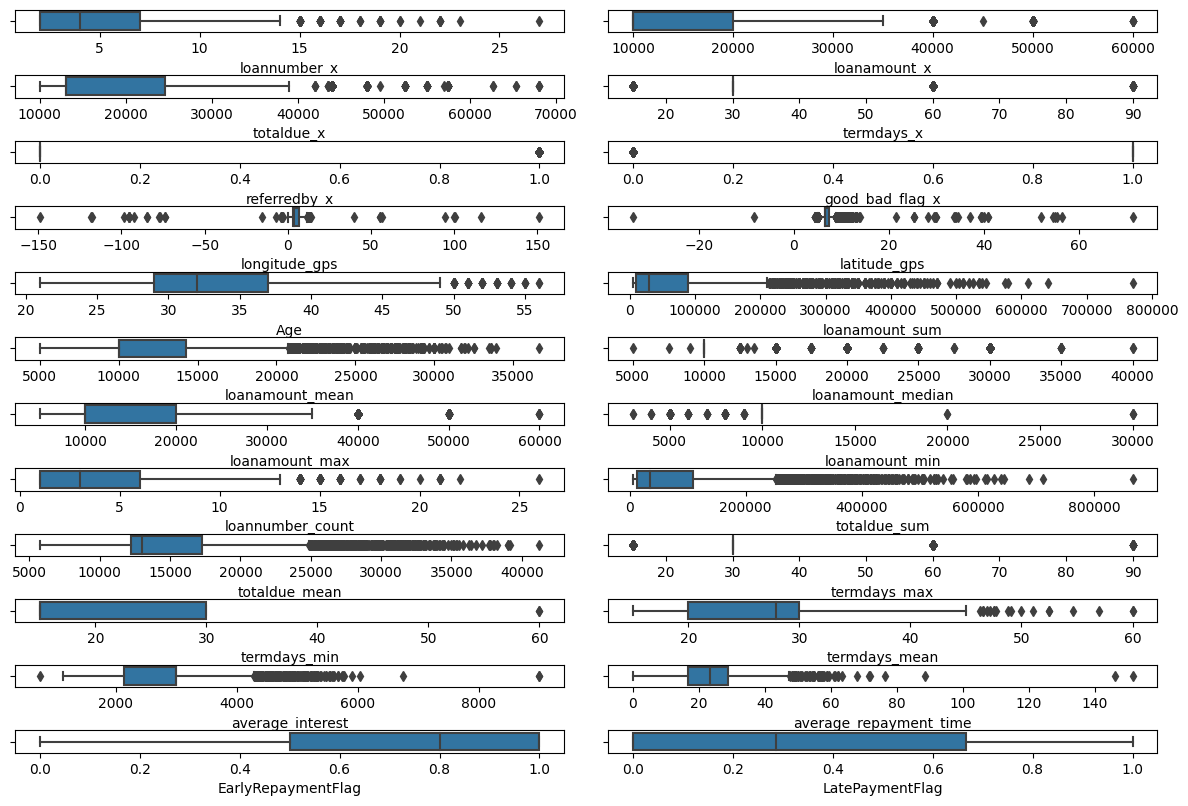

In [ ]:
num_plots = len(numcol)
num_rows = int(num_plots/ 2)
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.tight_layout(pad=1.0)
axes = axes.flatten()
for i, col in enumerate(numcol):
    sn.boxplot(x=col, data=train_aggregated_df, ax=axes[i])
plt.show()

In [ ]:
Q1 = train_aggregated_df[numcol].quantile(0.25)
Q3 = train_aggregated_df[numcol].quantile(0.75)
iqr = Q3 - Q1
print(iqr)

loannumber_x                  5.000000
loanamount_x              10000.000000
totaldue_x                11500.000000
termdays_x                    0.000000
referredby_x                  0.000000
good_bad_flag_x               0.000000
longitude_gps                 3.193823
latitude_gps                  0.954888
Age                           8.000000
loanamount_sum            80000.000000
loanamount_mean            4285.714286
loanamount_median             0.000000
loanamount_max            10000.000000
loanamount_min                0.000000
loannumber_count              5.000000
totaldue_sum              95800.000000
totaldue_mean              5050.000000
termdays_max                  0.000000
termdays_min                 15.000000
termdays_mean                10.000000
average_interest            862.500000
average_repayment_time       12.338594
EarlyRepaymentFlag            0.500000
LatePaymentFlag               0.666667
dtype: float64


In [ ]:
train_aggregated_df[numcol].skew(axis=0)

loannumber_x              1.302301
loanamount_x              1.249207
totaldue_x                1.164123
termdays_x                1.934067
referredby_x              2.141184
good_bad_flag_x          -1.368519
longitude_gps            -5.192472
latitude_gps              9.613221
Age                       0.671489
loanamount_sum            2.257139
loanamount_mean           1.751235
loanamount_median         2.081867
loanamount_max            1.351646
loanamount_min            3.704017
loannumber_count          1.302862
totaldue_sum              2.162896
totaldue_mean             1.716948
termdays_max              1.518487
termdays_min              0.326602
termdays_mean            -0.011208
average_interest          0.451948
average_repayment_time    1.572536
EarlyRepaymentFlag       -0.803870
LatePaymentFlag           0.582625
dtype: float64

### Handling Latitude and Longitude Features
~Andre

High skewness in longitude and latitude

* Latitude is Postively skewed
* Longitude is Negatively skewed
Resources:

What is Skewness - https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/

How to deal with skewness - https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55

### Checking Correlation

<ipython-input-225-d2948de80bb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(round(train_aggregated_df.corr(),2), cmap="YlGnBu", linewidths=.5, annot=True)


<Axes: >

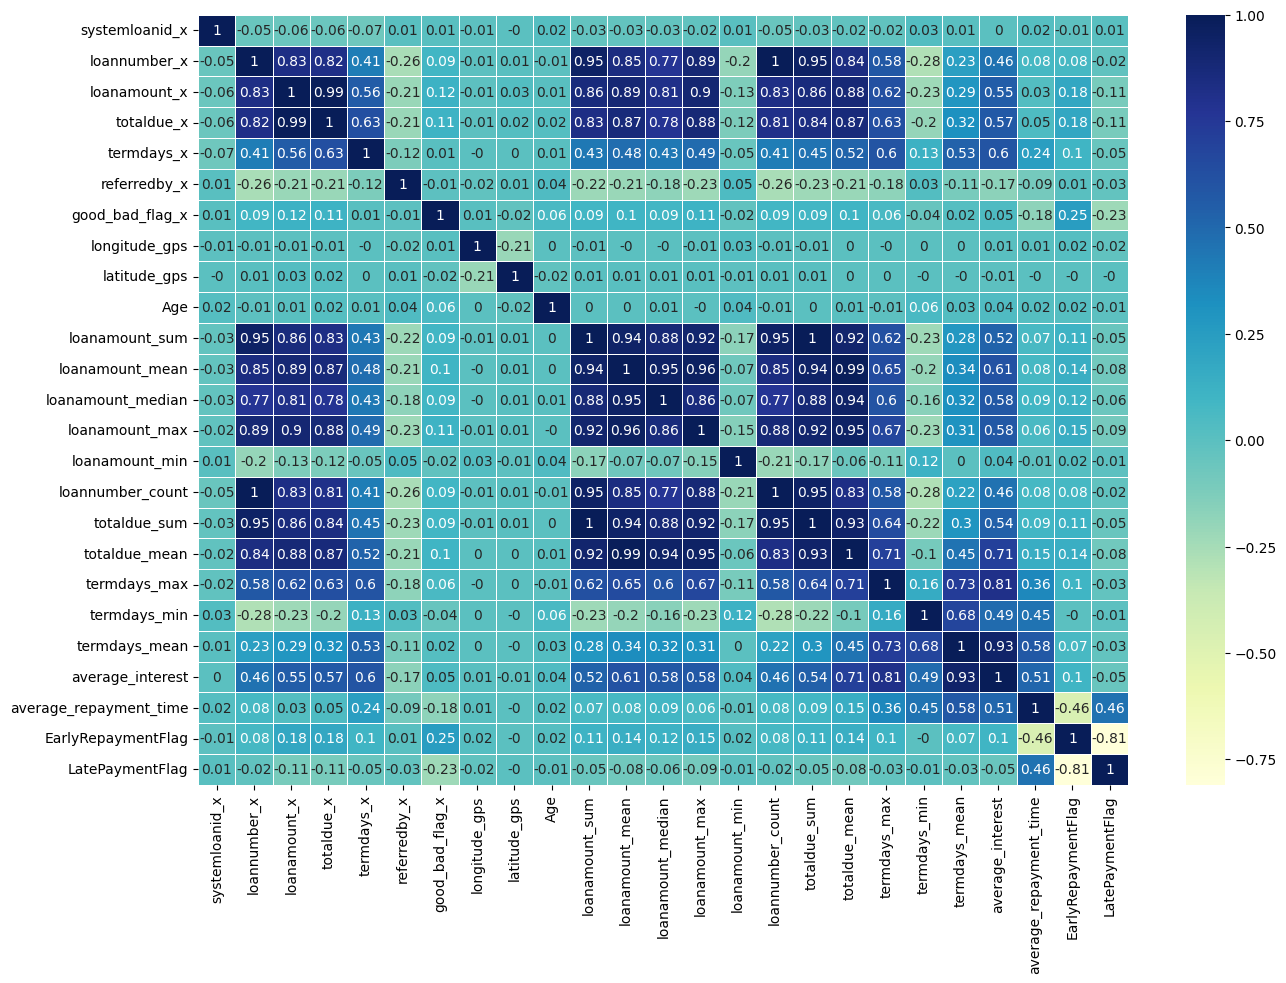

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sn.heatmap(round(train_aggregated_df.corr(), 2), cmap="YlGnBu", linewidths=.5, annot=True)

In [ ]:
#sn.set(style="ticks")
#sn.pairplot(traindf, hue="good_bad_flag")

## Repeating actions for test df


### check Test DF info

In [ ]:
#perform same merge on the test dfs
# Perform a left merge
testdf = testperf.merge(traindemo, on='customerid',how = 'left')

testdf.shape

(1450, 17)

In [ ]:
testdf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN,1983-12-16,Other,5.835219,8.274730,First Bank,NaN,Permanent,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN,1986-04-06,Savings,3.245768,6.601778,First Bank,NaN,Permanent,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN,1981-09-05,Savings,3.227945,6.586668,UBA,NaN,Permanent,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN,1977-11-16,Savings,6.106486,7.287064,Zenith Bank,NaN,NaN,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN,1975-08-25,Savings,5.248368,13.059864,UBA,NaN,Permanent,NaN


### outstanding - date format


In [ ]:
#challenge - inconsistent approved date formats from test to train data set....would need to investigate the source and determine the correct value to use.
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  1450 non-null   object        
 1   systemloanid                1450 non-null   int64         
 2   loannumber                  1450 non-null   int64         
 3   approveddate                1450 non-null   object        
 4   creationdate                1450 non-null   object        
 5   loanamount                  1450 non-null   int64         
 6   totaldue                    1450 non-null   float64       
 7   termdays                    1450 non-null   int64         
 8   referredby                  184 non-null    object        
 9   birthdate                   1450 non-null   datetime64[ns]
 10  bank_account_type           1450 non-null   object        
 11  longitude_gps               1450 non-null   float64     

In [ ]:
testdf.duplicated().sum()

0

# Dealing with Missing Values in test df

In [ ]:
testdf.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    1266
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           1428
employment_status_clients      208
level_of_education_clients    1260
dtype: int64

In [ ]:
testdf.bank_branch_clients.value_counts()

HEAD OFFICE                     2
OREGUN                          2
AJOSE ADEOGUN                   1
KEFFI BRANCH IKOYI              1
OBA AKRAN ROAD, IKEJA,          1
OBA AKRAN                       1
ADENIRAN OGUNSANYA              1
PAIKO ROAD, MINNA               1
ILUPEJU                         1
ALAUSA                          1
ABULE EGBA U-TURN,BRANCH        1
HERITAGE BANK, DUGBE, IBADAN    1
MEDICAL ROAD IKEJA              1
AKOWONJO                        1
APAPA                           1
APAPA 1 COMMERCIAL ROAD         1
AWOLOWO                         1
47 LAGOS ROAD, IKORODU          1
DUGBE, IBADAN                   1
LADIPO                          1
Name: bank_branch_clients, dtype: int64

High number of variables and null values in this feature 'bank_branch_clients'. We can drop this column.

In [ ]:
#Dropping the bank_branch_clients feature
testdf = testdf.drop(['bank_branch_clients'], axis=1)

In [ ]:
testdf.employment_status_clients.value_counts()

Permanent        1075
Self-Employed     102
Student            47
Unemployed         17
Retired             1
Name: employment_status_clients, dtype: int64

In [ ]:
testdf.level_of_education_clients.value_counts()

Graduate         132
Secondary         30
Post-Graduate     24
Primary            4
Name: level_of_education_clients, dtype: int64

### Converting NaN to a value [ For now replacing with unknown, can use other techniques]

* employment_status_clients: NaN = Permanent
* level_of_education_clients: NaN = Others
* referredby_x: NaN = 0
* referredby_y: NaN = 0

## Imp Note: Some algorithms can handle missing data on their own. So, understand your ML algo carefully.

**level_of_education_clients = NaN = Others**

In [ ]:
testdf["level_of_education_clients"] = testdf["level_of_education_clients"].fillna("Others")

In [ ]:
testdf.level_of_education_clients.value_counts()

Others           1260
Graduate          132
Secondary          30
Post-Graduate      24
Primary             4
Name: level_of_education_clients, dtype: int64

**employment_status_clients - NaN = Permanent**

In [ ]:
testdf.query("bank_name_clients == 'GT Bank' and  employment_status_clients == 'Permanent'").head(3)
#testdf.query("bank_name_clients == 'GT Bank' and  employment_status_clients != 'Permanent'")
#testdf.query("bank_name_clients == 'First Bank' and  employment_status_clients == 'Permanent'")


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
6,8a858e675c3fe0a1015c44ba8a037fee,301987980,2,14:28.0,14:20.0,10000,11500.0,15,NaN,1994-04-26,Savings,5.288827,7.604053,GT Bank,Permanent,Others
10,8a858ec95afc0922015b0edc17e34984,301965287,4,48:41.0,48:26.0,20000,24500.0,30,NaN,1982-04-15,Savings,3.339835,7.118107,GT Bank,Permanent,Others
13,8a858f085b494826015b4982ca1f1a0c,301998870,5,18:56.0,17:46.0,20000,24500.0,30,NaN,1978-03-07,Savings,7.154954,4.699606,GT Bank,Permanent,Others


Can observe that the most frequent is the 'Permanent' for most of the rows, also used sklearn iterative imputer and MICE techniques. Result is same - these techniques impute Permanent.

Refer to [Colab NB](https://colab.research.google.com/drive/1vb4lLKir13KVS4UfAYKkOcl5kiufEe0y?usp=sharing) for the implementation of these techniques.

In [ ]:
testdf["employment_status_clients"] = testdf["employment_status_clients"].fillna("Permanent")

**referredby_x: NaN = 0**<br>
**referredby_y: NaN = 0**

## Rename columns that are part of the original test perf to differentiate from testprevloans aggregated data

In [ ]:
#Add '_x' to all of the columns that came from the 'testperf' df so we can keep track later of what comes from 'testperf' vs what comes from 'testprevloans'
# List of columns to which you want to add the suffix '_x'
columns_to_rename = ['systemloanid', 'loannumber', 'approveddate', 'creationdate',
                     'loanamount', 'totaldue', 'termdays', 'referredby', 'good_bad_flag']

# Renaming the columns
testdf = testdf.rename(columns={col: col + '_x' for col in columns_to_rename})

# Display the new column names to verify
print(testdf.columns)

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'referredby_x', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients'],
      dtype='object')


In [ ]:
#Converting referred by columns to binary where 1 for referral and 0 for no referral
testdf['referredby_x'] = testdf['referredby_x'].notnull().astype('int')

print("referredby_X: ", testdf.referredby_x.value_counts())

referredby_X:  0    1266
1     184
Name: referredby_x, dtype: int64


In [ ]:
testdf.head(3)

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,0,1983-12-16,Other,5.835219,8.274730,First Bank,Permanent,Others
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,0,1986-04-06,Savings,3.245768,6.601778,First Bank,Permanent,Others
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,0,1981-09-05,Savings,3.227945,6.586668,UBA,Permanent,Others


### Converting birthdate to Age and dropping the birthdate column

In [ ]:
#converting string to datetime
testdf['birthdate']=pd.to_datetime(testdf['birthdate'])

In [ ]:
#Calculating Age and adding the new feature to the dataframe - used 2017 because data is from 2017 - we are getting age at time of request
testdf['Age'] = 2017 - testdf.birthdate.dt.year
testdf['Age']

0       34
1       31
2       36
3       40
4       42
        ..
1445    27
1446    40
1447    23
1448    28
1449    43
Name: Age, Length: 1450, dtype: int64

In [ ]:
#Dropping the birthdate feature
testdf = testdf.drop(['birthdate'], axis=1)

In [ ]:
testdf.head(3)

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,0,Other,5.835219,8.274730,First Bank,Permanent,Others,34
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,0,Savings,3.245768,6.601778,First Bank,Permanent,Others,31
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,0,Savings,3.227945,6.586668,UBA,Permanent,Others,36


In [ ]:
testdf.isnull().sum()

customerid                    0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
referredby_x                  0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Age                           0
dtype: int64

### Calculate the duration of loan creation to approval (difference)

voted to remove since the testperf csv doesnt have dates in the columns for approval and creation date.


In [ ]:
# Calculate the duration in hours
# First, find the total duration in seconds and then convert to hours
#testdf['creationdate_approveddate_difference'] = (testdf['approveddate_x'] - testdf['creationdate_x']).dt.total_seconds() / 3600

# Display the DataFrame with the new column
#testdf.head(3)

# Data Aggregation at Customer Level

Note: .astype(int): Converts the boolean array obtained into an integer array, where True becomes 1 and False becomes 0.

In [ ]:
testprevcopy = testprevloans.copy()

#grouping by 'customerid'
grouped_df_test = testprevcopy.groupby('customerid')


In [ ]:
grouped_df_test.head( )

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00,2016-05-17 09:36:55,10000.0,13000.0,30,2016-06-17 00:04:15,NaN,2016-06-16,2016-06-16 15:44:08
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59,2017-02-04 20:28:52,30000.0,36800.0,60,2017-03-02 16:22:58,NaN,2017-03-06,2017-03-02 16:07:47
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22,2017-03-04 09:28:16,30000.0,34400.0,30,2017-04-02 00:44:24,NaN,2017-04-03,2017-04-01 21:29:46
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14,2016-06-02 13:27:08,10000.0,13000.0,30,2016-07-04 11:34:04,NaN,2016-07-04,2016-07-04 11:19:01
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12,2016-05-16 08:13:04,10000.0,11500.0,15,2016-06-02 00:02:58,NaN,2016-05-31,2016-06-01 15:22:34
...,...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32,2017-04-09 22:04:10,10000.0,13000.0,30,2017-05-02 22:27:03,8a858e4f5929c3df0159420645f46f55,2017-05-09,2017-05-02 22:11:54
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17,2017-04-15 22:33:05,10000.0,11500.0,15,2017-04-25 19:32:42,NaN,2017-05-02,2017-04-25 19:17:33
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28,2017-06-26 14:45:20,10000.0,13000.0,30,2017-07-13 13:12:43,NaN,2017-07-26,2017-07-13 13:02:34
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10,2017-05-03 05:56:04,10000.0,13000.0,30,2017-06-01 22:00:17,NaN,2017-06-02,2017-06-01 21:50:07


In [ ]:

# Performing aggregations
aggregated_df_test = grouped_df_test.agg({
    'loanamount': ['sum', 'mean', 'median', 'max', 'min'],  # Various aggregations for loan amount
    'loannumber': 'count', # Counting the number of loans
    'totaldue': ['sum','mean'], #sum and mean of total due from all previous loans
    'termdays': ['max', 'min','mean'],  # Max, min and mean for term days
    # Add other aggregations as needed
}).reset_index()

# Flattening the MultiIndex in columns
aggregated_df_test.columns = ['_'.join(col).strip() for col in aggregated_df_test.columns.values]

# Displaying the first few rows of the aggregated DataFrame
aggregated_df_test.head()



,customerid_,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean
0,8a28afc7474813a40147639ec637156b,178000.0,17800.000000,17500.0,30000.0,8000.0,10,210900.0,21090.000000,60,15,31.5
1,8a3735d5518aba7301518ac34413010d,70000.0,11666.666667,10000.0,20000.0,10000.0,6,88000.0,14666.666667,30,15,27.5
2,8a76e7d443e6e97c0143ed099d102b1d,20000.0,10000.000000,10000.0,10000.0,10000.0,2,23000.0,11500.000000,15,15,15.0
3,8a818823525dceef01525deda2480384,170000.0,18888.888889,15000.0,40000.0,5000.0,9,209975.0,23330.555556,60,30,40.0
4,8a818926522ea5ef01523aff15c37482,20000.0,10000.000000,10000.0,10000.0,10000.0,2,26000.0,13000.000000,30,30,30.0


In [ ]:
#remove '_' from customerid column
aggregated_df_test.rename(columns= {'customerid_':'customerid'}, inplace= True)

**Average interest and fees**

In [ ]:
# Calculate the time difference between 'totaldue' and 'loanamount'
testprevcopy['average_interest'] = testprevcopy['totaldue'] - testprevcopy['loanamount']

# Group by 'customerid' and calculate the average interest
average_interest = testprevcopy.groupby('customerid')['average_interest'].mean().reset_index()

# Display the result
average_interest

,customerid,average_interest
0,8a28afc7474813a40147639ec637156b,3290.000000
1,8a3735d5518aba7301518ac34413010d,3000.000000
2,8a76e7d443e6e97c0143ed099d102b1d,1500.000000
3,8a818823525dceef01525deda2480384,4441.666667
4,8a818926522ea5ef01523aff15c37482,3000.000000
...,...,...
1437,8a858fff5a36fe68015a3744f0021e89,2437.500000
1438,8aaae7a74400b28201441c8b62514150,2500.000000
1439,8aab10f748cf78ff0148d11fac1447a6,3000.000000
1440,8aab160f499477da014999ba2f0f578b,1750.000000


**Average Loan Repayment Time**

In [ ]:
testprevcopy.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,average_interest
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00,2016-05-17 09:36:55,10000.0,13000.0,30,2016-06-17 00:04:15,NaN,2016-06-16,2016-06-16 15:44:08,3000.0
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59,2017-02-04 20:28:52,30000.0,36800.0,60,2017-03-02 16:22:58,NaN,2017-03-06,2017-03-02 16:07:47,6800.0
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22,2017-03-04 09:28:16,30000.0,34400.0,30,2017-04-02 00:44:24,NaN,2017-04-03,2017-04-01 21:29:46,4400.0
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14,2016-06-02 13:27:08,10000.0,13000.0,30,2016-07-04 11:34:04,NaN,2016-07-04,2016-07-04 11:19:01,3000.0
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12,2016-05-16 08:13:04,10000.0,11500.0,15,2016-06-02 00:02:58,NaN,2016-05-31,2016-06-01 15:22:34,1500.0


In [ ]:
# Calculate the time difference between 'closeddate' and 'approveddate' in days
testprevcopy['average_repayment_time'] = (testprevcopy['closeddate'] - testprevcopy['approveddate'])/np.timedelta64(1,'D')

# Group by 'customerid' and calculate the average time difference
average_repayment_time = testprevcopy.groupby('customerid')['average_repayment_time'].mean().reset_index()

# Display the result
average_repayment_time

,customerid,average_repayment_time
0,8a28afc7474813a40147639ec637156b,25.965302
1,8a3735d5518aba7301518ac34413010d,14.904429
2,8a76e7d443e6e97c0143ed099d102b1d,13.914896
3,8a818823525dceef01525deda2480384,39.673767
4,8a818926522ea5ef01523aff15c37482,41.128843
...,...,...
1437,8a858fff5a36fe68015a3744f0021e89,14.924060
1438,8aaae7a74400b28201441c8b62514150,24.561327
1439,8aab10f748cf78ff0148d11fac1447a6,34.101586
1440,8aab160f499477da014999ba2f0f578b,20.958561


**Early Repayment Flag**

This code calculates the difference in days between the 'closeddate' and 'approveddate' for each loan, and then checks if this duration is less than the 'termdays'. The resulting 'EarlyRepaymentFlag' is set to 1 if any loan meets this condition and 0 otherwise.

This is actually the average. If the customer closed date before the term date it is 1. If customer closed date before term date 50%of time it is 0.5.

In [ ]:
# Calculate the difference between 'closeddate' and 'creationdate'
testprevcopy['repayment_duration'] = (testprevcopy['closeddate'] - testprevcopy['approveddate']).dt.days

# Create the 'EarlyRepaymentFlag' based on the condition
testprevcopy['EarlyRepaymentFlag'] = (testprevcopy['repayment_duration'] < testprevcopy['termdays']).astype(int)

avg_EarlyRepaymentFlag = testprevcopy.groupby('customerid')['EarlyRepaymentFlag'].mean().reset_index()

avg_EarlyRepaymentFlag

,customerid,EarlyRepaymentFlag
0,8a28afc7474813a40147639ec637156b,0.800000
1,8a3735d5518aba7301518ac34413010d,0.833333
2,8a76e7d443e6e97c0143ed099d102b1d,1.000000
3,8a818823525dceef01525deda2480384,0.555556
4,8a818926522ea5ef01523aff15c37482,0.000000
...,...,...
1437,8a858fff5a36fe68015a3744f0021e89,1.000000
1438,8aaae7a74400b28201441c8b62514150,0.666667
1439,8aab10f748cf78ff0148d11fac1447a6,0.000000
1440,8aab160f499477da014999ba2f0f578b,0.333333


**LatePaymentFlag**

This code checks if the 'firstrepaiddate' is greater than the 'firstduedate' for each customer. If this condition is true, 'LatePaymentFlag' is set to 1, indicating that the customer has been late on a payment. Otherwise, it is set to 0.

In [ ]:
# Create the 'LatePaymentFlag' based on the condition
testprevcopy['LatePaymentFlag'] = (testprevcopy['firstrepaiddate'] > testprevcopy['firstduedate']).astype(int)
avg_LatePaymentFlag = testprevcopy.groupby('customerid')['LatePaymentFlag'].mean().reset_index()
avg_LatePaymentFlag

,customerid,LatePaymentFlag
0,8a28afc7474813a40147639ec637156b,0.400000
1,8a3735d5518aba7301518ac34413010d,0.166667
2,8a76e7d443e6e97c0143ed099d102b1d,0.000000
3,8a818823525dceef01525deda2480384,0.888889
4,8a818926522ea5ef01523aff15c37482,1.000000
...,...,...
1437,8a858fff5a36fe68015a3744f0021e89,0.000000
1438,8aaae7a74400b28201441c8b62514150,0.333333
1439,8aab10f748cf78ff0148d11fac1447a6,1.000000
1440,8aab160f499477da014999ba2f0f578b,0.666667


### Perform join on aggregated df to other aggregated dataframes

Add additional columns with calculated fields to aggregated_df_test (prev loan aggregated data)

In [ ]:
# Perform a left merge on each aggregated df to merge it to aggregated_df_test
#dfs = [average_interest, average_repayment_time, avg_EarlyRepaymentFlag, avg_LatePaymentFlag] # list of dataframes

aggregated_df_test = aggregated_df_test.merge(average_interest, on= 'customerid', how='left')
aggregated_df_test = aggregated_df_test.merge(average_repayment_time, on= 'customerid', how='left')
aggregated_df_test = aggregated_df_test.merge(avg_EarlyRepaymentFlag, on= 'customerid', how='left')
aggregated_df_test = aggregated_df_test.merge(avg_LatePaymentFlag, on= 'customerid', how='left')






In [ ]:
aggregated_df_test.head()

,customerid,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag
0,8a28afc7474813a40147639ec637156b,178000.0,17800.000000,17500.0,30000.0,8000.0,10,210900.0,21090.000000,60,15,31.5,3290.000000,25.965302,0.800000,0.400000
1,8a3735d5518aba7301518ac34413010d,70000.0,11666.666667,10000.0,20000.0,10000.0,6,88000.0,14666.666667,30,15,27.5,3000.000000,14.904429,0.833333,0.166667
2,8a76e7d443e6e97c0143ed099d102b1d,20000.0,10000.000000,10000.0,10000.0,10000.0,2,23000.0,11500.000000,15,15,15.0,1500.000000,13.914896,1.000000,0.000000
3,8a818823525dceef01525deda2480384,170000.0,18888.888889,15000.0,40000.0,5000.0,9,209975.0,23330.555556,60,30,40.0,4441.666667,39.673767,0.555556,0.888889
4,8a818926522ea5ef01523aff15c37482,20000.0,10000.000000,10000.0,10000.0,10000.0,2,26000.0,13000.000000,30,30,30.0,3000.000000,41.128843,0.000000,1.000000


In [ ]:
aggregated_df_test.isnull().sum()

customerid                0
loanamount_sum            0
loanamount_mean           0
loanamount_median         0
loanamount_max            0
loanamount_min            0
loannumber_count          0
totaldue_sum              0
totaldue_mean             0
termdays_max              0
termdays_min              0
termdays_mean             0
average_interest          0
average_repayment_time    0
EarlyRepaymentFlag        0
LatePaymentFlag           0
dtype: int64

#### Check the shape of the 2 dataframes before the merge

In [ ]:
testdf.shape

(1450, 16)

In [ ]:
aggregated_df_test.shape

(1442, 16)



```
`# This is formatted as code`
```

### Merge Test DF (demographic + current loans (testdemo, testperf)) with the prev loan aggregation dataframe

In [ ]:
# Perform a left merge
test_aggregated_df = testdf.merge(aggregated_df_test, on='customerid', how = 'left')

In [ ]:
#check shape of aggregated train df
test_aggregated_df.shape

(1450, 31)

In [ ]:
test_aggregated_df.head()

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,0,Other,5.835219,8.274730,First Bank,Permanent,Others,34,26000.0,8666.666667,10000.0,10000.0,6000.0,3.0,32900.0,10966.666667,30.0,15.0,25.000000,2300.000000,28.617388,0.333333,0.666667
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,0,Savings,3.245768,6.601778,First Bank,Permanent,Others,31,215000.0,23888.888889,30000.0,40000.0,5000.0,9.0,248400.0,27600.000000,60.0,15.0,31.666667,3711.111111,24.689053,0.777778,0.222222
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,0,Savings,3.227945,6.586668,UBA,Permanent,Others,36,65000.0,13000.000000,10000.0,20000.0,10000.0,5.0,79675.0,15935.000000,30.0,15.0,27.000000,2935.000000,31.739190,0.400000,0.600000
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,0,Savings,6.106486,7.287064,Zenith Bank,Permanent,Others,40,120000.0,17142.857143,20000.0,30000.0,10000.0,7.0,135400.0,19342.857143,30.0,15.0,17.142857,2200.000000,13.837419,1.000000,0.000000
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,0,Savings,5.248368,13.059864,UBA,Permanent,Others,42,30000.0,10000.000000,10000.0,10000.0,10000.0,3.0,37500.0,12500.000000,30.0,15.0,25.000000,2500.000000,22.252338,1.000000,0.333333


In [ ]:
#check null after merge
test_aggregated_df.isnull().sum()

customerid                    0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
referredby_x                  0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Age                           0
loanamount_sum                8
loanamount_mean               8
loanamount_median             8
loanamount_max                8
loanamount_min                8
loannumber_count              8
totaldue_sum                  8
totaldue_mean                 8
termdays_max                  8
termdays_min                  8
termdays_mean                 8
average_interest              8
average_repayment_time        8
EarlyRepaymentFlag            8
LatePaymentFlag               8
dtype: i

In [ ]:
null_mask = test_aggregated_df.isnull().any(axis=1)
null_rows = test_aggregated_df[null_mask]

null_rows

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag
161,8a858ecd57b919a70157c8398b5d5300,301986633,2,43:27.0,43:13.0,10000,13000.0,30,0,Savings,6.533070,9.575809,Diamond Bank,Permanent,Others,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,8a858ecc57b9184b0157ba61dab46cbc,301999250,2,56:05.0,54:58.0,10000,13000.0,30,0,Savings,6.954103,6.184677,First Bank,Permanent,Others,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,8a858ecc57b9184b0157bd7491b650ec,301996804,2,58:51.0,57:44.0,20000,24500.0,30,1,Savings,3.525146,6.668493,GT Bank,Permanent,Secondary,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,8a8589005384ab570153880ceba74594,301964860,3,29:56.0,29:40.0,30000,39000.0,60,0,Other,3.415010,6.444252,GT Bank,Permanent,Graduate,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,8a858f2d5853901a01585c79a6021b8f,301970405,2,54:24.0,54:05.0,30000,39000.0,60,1,Savings,3.306754,6.511447,GT Bank,Permanent,Graduate,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,8a858e9f59d692440159da2c60b42106,301977106,2,00:20.0,59:12.0,20000,23000.0,30,0,Savings,3.362373,6.642125,UBA,Permanent,Graduate,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,8a858f0d58a18ebc0158a9bf124b5a30,301989214,2,39:19.0,38:59.0,10000,11500.0,15,0,Savings,3.309237,6.644254,Zenith Bank,Permanent,Graduate,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,8a85890253e2f1180153eae33e5e6bc3,301983398,3,00:19.0,59:08.0,20000,24500.0,30,0,Savings,3.373518,6.643441,GT Bank,Permanent,Graduate,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_aggregated_df.describe()

,systemloanid_x,loannumber_x,loanamount_x,totaldue_x,termdays_x,referredby_x,longitude_gps,latitude_gps,Age,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag
count,1.450000e+03,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,3.019807e+08,5.088966,17482.758621,20874.664069,28.810345,0.126897,4.684710,7.122337,32.922759,66655.339806,12685.814936,12414.008322,16468.099861,9865.464632,4.096394,79200.390014,15411.470744,30.062413,21.813454,25.458544,2725.655808,23.877844,0.656485,0.389633
std,1.339572e+04,3.665210,10585.420034,11726.584630,11.074839,0.332972,5.451703,3.217316,6.201880,89156.248874,4672.814609,5338.918494,10021.179258,859.247827,3.669708,102585.175693,5215.061805,12.191918,7.471102,6.732470,826.092205,10.842183,0.368587,0.383116
min,3.019585e+08,2.000000,10000.000000,10500.000000,15.000000,0.000000,-97.883895,-74.005974,21.000000,4000.000000,2000.000000,2000.000000,2000.000000,1000.000000,1.000000,5200.000000,2600.000000,15.000000,15.000000,15.000000,600.000000,0.018021,0.000000,0.000000
25%,3.019687e+08,2.000000,10000.000000,13000.000000,30.000000,0.000000,3.355011,6.468007,28.250000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000,13000.000000,12250.000000,30.000000,15.000000,20.000000,2084.090909,16.458993,0.428571,0.000000
50%,3.019799e+08,4.000000,10000.000000,13000.000000,30.000000,0.000000,3.631645,6.617392,32.000000,30000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.000000,36000.000000,13000.000000,30.000000,15.000000,30.000000,3000.000000,24.076999,0.750000,0.333333
75%,3.019929e+08,7.000000,20000.000000,24500.000000,30.000000,0.000000,6.579547,7.421223,37.000000,80000.000000,14000.000000,10000.000000,20000.000000,10000.000000,6.000000,93712.500000,16833.333333,30.000000,30.000000,30.000000,3000.000000,29.417607,1.000000,0.666667
max,3.020040e+08,34.000000,60000.000000,68100.000000,90.000000,1.000000,116.296503,55.004022,55.000000,701000.000000,34250.000000,40000.000000,60000.000000,20000.000000,33.000000,764875.000000,38243.750000,90.000000,30.000000,54.230769,5875.000000,152.166254,1.000000,1.000000


In [ ]:
# Assuming you have already created the test_aggregated_df DataFrame as shown earlier

# List of customer IDs to update
customer_ids_to_update = [
    '8a858ecd57b919a70157c8398b5d5300',
    '8a858ecc57b9184b0157ba61dab46cbc',
    '8a858ecc57b9184b0157bd7491b650ec',
    '8a8589005384ab570153880ceba74594',
    '8a858f2d5853901a01585c79a6021b8f',
    '8a858e9f59d692440159da2c60b42106',
    '8a858f0d58a18ebc0158a9bf124b5a30',
    '8a85890253e2f1180153eae33e5e6bc3'
]

# Iterate through customer IDs and update the original DataFrame
for customer_id in customer_ids_to_update:
    original_idx = test_aggregated_df[test_aggregated_df['customerid'] == customer_id].index[0]
    test_aggregated_df.at[original_idx, 'loanamount_sum'] = test_aggregated_df.at[original_idx, 'loanamount_x']
    test_aggregated_df.at[original_idx, 'loanamount_mean'] = test_aggregated_df.at[original_idx, 'loanamount_x']
    test_aggregated_df.at[original_idx, 'loanamount_median'] = test_aggregated_df.at[original_idx, 'loanamount_x']
    test_aggregated_df.at[original_idx, 'loanamount_max'] = test_aggregated_df.at[original_idx, 'loanamount_x']
    test_aggregated_df.at[original_idx, 'loanamount_min'] = test_aggregated_df.at[original_idx, 'loanamount_x']
    test_aggregated_df.at[original_idx, 'loannumber_count'] = test_aggregated_df.at[original_idx, 'loannumber_x']
    test_aggregated_df.at[original_idx, 'totaldue_sum'] = test_aggregated_df.at[original_idx, 'totaldue_x']
    test_aggregated_df.at[original_idx, 'totaldue_mean'] = test_aggregated_df.at[original_idx, 'totaldue_x']
    test_aggregated_df.at[original_idx, 'termdays_max'] = test_aggregated_df.at[original_idx, 'termdays_x']
    test_aggregated_df.at[original_idx, 'termdays_min'] = test_aggregated_df.at[original_idx, 'termdays_x']
    test_aggregated_df.at[original_idx, 'termdays_mean'] = test_aggregated_df.at[original_idx, 'termdays_x']
    test_aggregated_df.at[original_idx, 'average_interest'] = test_aggregated_df.at[original_idx, 'totaldue_x'] - test_aggregated_df.at[original_idx, 'loanamount_x']
    test_aggregated_df.at[original_idx, 'average_repayment_time'] = 23.877844
    test_aggregated_df.at[original_idx, 'EarlyRepaymentFlag'] = 0
    test_aggregated_df.at[original_idx, 'LatePaymentFlag'] = 0

# Print the updated original DataFrame
test_aggregated_df.head()





,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,0,Other,5.835219,8.274730,First Bank,Permanent,Others,34,26000.0,8666.666667,10000.0,10000.0,6000.0,3.0,32900.0,10966.666667,30.0,15.0,25.000000,2300.000000,28.617388,0.333333,0.666667
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,0,Savings,3.245768,6.601778,First Bank,Permanent,Others,31,215000.0,23888.888889,30000.0,40000.0,5000.0,9.0,248400.0,27600.000000,60.0,15.0,31.666667,3711.111111,24.689053,0.777778,0.222222
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,0,Savings,3.227945,6.586668,UBA,Permanent,Others,36,65000.0,13000.000000,10000.0,20000.0,10000.0,5.0,79675.0,15935.000000,30.0,15.0,27.000000,2935.000000,31.739190,0.400000,0.600000
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,0,Savings,6.106486,7.287064,Zenith Bank,Permanent,Others,40,120000.0,17142.857143,20000.0,30000.0,10000.0,7.0,135400.0,19342.857143,30.0,15.0,17.142857,2200.000000,13.837419,1.000000,0.000000
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,0,Savings,5.248368,13.059864,UBA,Permanent,Others,42,30000.0,10000.000000,10000.0,10000.0,10000.0,3.0,37500.0,12500.000000,30.0,15.0,25.000000,2500.000000,22.252338,1.000000,0.333333


In [ ]:
null_mask = test_aggregated_df.isnull().any(axis=1)
null_rows = test_aggregated_df[null_mask]

null_rows

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag


## Final Clean Dataframes to use in analysis:

Train: train_aggregated_df

Test: test_aggregated_df

## If you would like to export the dataframes above to CSVs

In [ ]:
# Will use your same custom path where the original data files were imported from. You set this above. Make sure to include a / at the end!
#print(path)

In [ ]:
# Set the CSV file names
path_train_aggregated_df = path + "train_aggregated_df.csv"
path_test_aggregated_df = path + "test_aggregated_df.csv"
print(path_train_aggregated_df)
print(path_test_aggregated_df)

/content/drive/MyDrive/869_datasets/train_aggregated_df.csv
/content/drive/MyDrive/869_datasets/test_aggregated_df.csv


In [ ]:
# Uncomment the 2 lines below before running, if you would like to proceed with the export thing
# train_aggregated_df.to_csv(path_train_aggregated_df, index=False)
# test_aggregated_df.to_csv(path_test_aggregated_df, index=False)